In [1]:
import pandas as pd
df = pd.read_csv('structure links.csv')
df

,DrugBank ID,Name,Drug Groups,SMILES
0,DB00006,Bivalirudin,approved; investigational,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...
1,DB00007,Leuprolide,approved; investigational,CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=...
2,DB00014,Goserelin,approved,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...
3,DB00027,Gramicidin D,approved,CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...
4,DB00035,Desmopressin,approved,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...
...,...,...,...,...
11290,DB16735,PAT-1251,investigational,NCC1=CC(=NC(OC2=CC(=CC=C2)C(=O)N2C[C@@H](O)[C@...
11291,DB16737,MM3122,experimental,CC(=O)NCC(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](CC1...
11292,DB16739,MK-886,experimental,CC(C)C1=CC=C2N(CC3=CC=C(Cl)C=C3)C(CC(C)(C)C(O)...
11293,DB16741,Bortezomib D-mannitol,approved,[H][C@@]1(OB(O[C@]1([H])[C@H](O)CO)[C@H](CC(C)...


In [2]:
import selfies as sf
df['SMILES']=df['SMILES'].astype(str)
df = df.dropna()
df['SMILES'][0]

ModuleNotFoundError: No module named 'selfies'

In [ ]:
df['selfies']='Nan'
df   

In [ ]:
import numpy as np

In [ ]:
for i in range(0,11295 ):
    try:
        df['selfies'][i]= sf.encoder(df['SMILES'][i])
    except:
        df['selfies'][i]=np.nan

In [ ]:
df = df.dropna().reset_index()
array=list(df['selfies'])

In [ ]:
df['selfies']

In [ ]:
for i in range(0,11238):
    array[i]=array[i].split('][')
    array[i][0]=array[i][0].replace('[', '')
    array[i][-1]=array[i][-1].replace(']', '')

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=array, vector_size=100, window=5, min_count=1, workers=4)
model.save("word2vec.model")

In [ ]:
model.build_vocab(array)

In [ ]:
vector=model.wv['C']
sims = model.wv.most_similar('C', topn=10)

In [ ]:
word_vectors = model.wv

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [ ]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(array)]
model = Doc2Vec(documents, vector_size=100, window=2, min_count=1, workers=4)

In [ ]:
matrix=model.dv.get_normed_vectors()

In [ ]:
df_dv=pd.DataFrame(matrix.tolist())

In [17]:
df_new = pd.concat([df, df_dv], axis=1)

In [18]:
df_new.to_csv('drug_dv.csv')

In [19]:
import pandas as pd
edge = pd.read_csv('DDI.csv')
node_features = pd.read_csv('node_features.csv')
node_features.index=node_features['DrugBank ID']

In [20]:
node_features.drop(['Unnamed: 0','DrugBank ID'],axis=1)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
DrugBank ID,,,,,,,,,,,,,,,,,,,,,
DB00006,0.122877,-0.090515,-0.075366,0.031643,0.095440,-0.053157,0.040029,-0.035539,0.055253,-0.040285,...,0.115622,-0.108238,-0.076285,0.111395,-0.117893,-0.195370,-0.172501,0.029579,-0.277418,0.188064
DB00007,0.152444,-0.193899,-0.102517,-0.016207,0.149515,-0.026267,0.051903,0.052790,0.146498,-0.068266,...,-0.109901,-0.095015,-0.048449,0.176152,-0.046172,-0.138750,-0.105260,-0.058032,-0.186344,0.194083
DB00014,0.046567,-0.105780,-0.043613,-0.091112,0.215184,-0.136261,0.113747,0.102218,0.129476,-0.170769,...,-0.062360,-0.030717,-0.027848,0.044246,0.224420,-0.044897,-0.024015,-0.125997,-0.155581,0.068495
DB00027,0.097976,-0.139038,-0.046148,-0.008759,0.139863,-0.078267,0.065165,0.017646,0.107471,-0.085115,...,-0.025301,-0.109460,-0.128838,0.166403,-0.109499,-0.143457,-0.177059,0.015968,-0.208228,0.124561
DB00035,0.166446,-0.144469,-0.027670,-0.134427,0.052022,-0.036635,0.059955,0.098426,0.033268,-0.061395,...,0.106333,-0.081870,-0.023400,0.138693,-0.006185,-0.100560,-0.215361,-0.018916,-0.211364,0.152518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DB16735,0.064175,-0.029122,-0.012052,-0.062182,0.012103,0.093555,0.100837,-0.001119,0.025028,-0.149725,...,-0.044096,0.085674,-0.131160,0.128274,0.075435,0.027632,-0.045440,-0.129351,0.083246,0.177505
DB16737,0.211294,-0.177780,-0.003668,-0.141526,0.016267,0.075559,-0.081635,-0.087036,0.113036,0.061266,...,-0.004635,-0.040026,-0.040922,0.103021,-0.149858,-0.027499,-0.221795,-0.063637,-0.203195,0.029449
DB16739,0.031983,-0.076199,0.025926,-0.155516,-0.057316,0.122120,-0.017688,0.092364,-0.006445,-0.065008,...,-0.081502,0.087130,-0.004139,0.027369,0.157311,0.198962,0.041405,-0.171322,0.141168,-0.008092


In [21]:
edge.shape[0]

48514

In [22]:
missing_target=[]
for j in range(0,edge.shape[0]):
    if edge['target'][j] not in node_features.index:
        missing_target.append(j)
edge=edge.drop(index=missing_target)

In [23]:
edge=edge.reset_index().drop('index',axis=1)

In [24]:
missing_source=[]
for i in range(0,edge.shape[0]):
    if edge['source'][i] not in node_features.index:
        missing_source.append(i)
edge=edge.drop(index=missing_source)

In [25]:
edge=edge.reset_index().drop('index',axis=1)

In [26]:
edge['target'][100]

'DB01026'

In [27]:
edge

,source,target
0,DB00862,DB00966
1,DB00575,DB00806
2,DB01242,DB08893
3,DB01151,DB08883
4,DB01235,DB01275
...,...,...
41754,DB00542,DB01354
41755,DB00476,DB01239
41756,DB00621,DB01120
41757,DB00808,DB01356


In [28]:
node_features=node_features.drop(['Unnamed: 0','DrugBank ID'],axis=1)

In [29]:
node_features

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
DrugBank ID,,,,,,,,,,,,,,,,,,,,,
DB00006,0.122877,-0.090515,-0.075366,0.031643,0.095440,-0.053157,0.040029,-0.035539,0.055253,-0.040285,...,0.115622,-0.108238,-0.076285,0.111395,-0.117893,-0.195370,-0.172501,0.029579,-0.277418,0.188064
DB00007,0.152444,-0.193899,-0.102517,-0.016207,0.149515,-0.026267,0.051903,0.052790,0.146498,-0.068266,...,-0.109901,-0.095015,-0.048449,0.176152,-0.046172,-0.138750,-0.105260,-0.058032,-0.186344,0.194083
DB00014,0.046567,-0.105780,-0.043613,-0.091112,0.215184,-0.136261,0.113747,0.102218,0.129476,-0.170769,...,-0.062360,-0.030717,-0.027848,0.044246,0.224420,-0.044897,-0.024015,-0.125997,-0.155581,0.068495
DB00027,0.097976,-0.139038,-0.046148,-0.008759,0.139863,-0.078267,0.065165,0.017646,0.107471,-0.085115,...,-0.025301,-0.109460,-0.128838,0.166403,-0.109499,-0.143457,-0.177059,0.015968,-0.208228,0.124561
DB00035,0.166446,-0.144469,-0.027670,-0.134427,0.052022,-0.036635,0.059955,0.098426,0.033268,-0.061395,...,0.106333,-0.081870,-0.023400,0.138693,-0.006185,-0.100560,-0.215361,-0.018916,-0.211364,0.152518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DB16735,0.064175,-0.029122,-0.012052,-0.062182,0.012103,0.093555,0.100837,-0.001119,0.025028,-0.149725,...,-0.044096,0.085674,-0.131160,0.128274,0.075435,0.027632,-0.045440,-0.129351,0.083246,0.177505
DB16737,0.211294,-0.177780,-0.003668,-0.141526,0.016267,0.075559,-0.081635,-0.087036,0.113036,0.061266,...,-0.004635,-0.040026,-0.040922,0.103021,-0.149858,-0.027499,-0.221795,-0.063637,-0.203195,0.029449
DB16739,0.031983,-0.076199,0.025926,-0.155516,-0.057316,0.122120,-0.017688,0.092364,-0.006445,-0.065008,...,-0.081502,0.087130,-0.004139,0.027369,0.157311,0.198962,0.041405,-0.171322,0.141168,-0.008092


In [30]:
from stellargraph import StellarGraph
G= StellarGraph({"Drug": node_features},{"Intraction": edge})
print(G.info())

StellarGraph: Undirected multigraph
 Nodes: 11239, Edges: 41759

 Node types:
  Drug: [11239]
    Features: float32 vector, length 100
    Edge types: Drug-Intraction->Drug

 Edge types:
    Drug-Intraction->Drug: [41759]
        Weights: all 1 (default)
        Features: none


In [31]:
import stellargraph as sg
from stellargraph.data import EdgeSplitter
from stellargraph.mapper import FullBatchLinkGenerator
from stellargraph.layer import GCN, LinkEmbedding


from tensorflow import keras
from sklearn import preprocessing, feature_extraction, model_selection

from stellargraph import globalvar
from stellargraph import datasets
from IPython.display import display, HTML
%matplotlib inline

In [32]:
# Define an edge splitter on the original graph G:
edge_splitter_test = EdgeSplitter(G)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G, and obtain the
# reduced graph G_test with the sampled links removed:
G_test, edge_ids_test, edge_labels_test = edge_splitter_test.train_test_split(
    p=0.2, method="global", keep_connected=True
)

** Sampled 8351 positive and 8351 negative edges. **


In [33]:
# Define an edge splitter on the reduced graph G_test:
edge_splitter_train = EdgeSplitter(G_test)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G_test, and obtain the
# reduced graph G_train with the sampled links removed:
G_train, edge_ids_train, edge_labels_train = edge_splitter_train.train_test_split(
    p=0.2, method="global", keep_connected=True
)

** Sampled 6681 positive and 6681 negative edges. **


In [34]:
epochs = 100


In [35]:
train_gen = FullBatchLinkGenerator(G_train, method="gcn")
train_flow = train_gen.flow(edge_ids_train, edge_labels_train)

Using GCN (local pooling) filters...


In [36]:
test_gen = FullBatchLinkGenerator(G_test, method="gcn")
test_flow = test_gen.flow(edge_ids_test, edge_labels_test)

Using GCN (local pooling) filters...


In [37]:
gcn = GCN(
    layer_sizes=[16, 16,16], activations=["relu", "relu","relu"], generator=train_gen, dropout=0.3
)

In [38]:
x_inp, x_out = gcn.in_out_tensors()


In [39]:
prediction = LinkEmbedding(activation="relu", method="ip")(x_out)


In [40]:
prediction = keras.layers.Reshape((-1,))(prediction)


In [41]:
model = keras.Model(inputs=x_inp, outputs=prediction)

model.compile(
    optimizer=keras.optimizers.Adam(lr=0.01),
    loss=keras.losses.binary_crossentropy,
    # not just "acc" due to https://github.com/tensorflow/tensorflow/issues/41361
    metrics=[keras.metrics.BinaryAccuracy()],
)

/home/sadeghi3/anaconda3/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [42]:
init_train_metrics = model.evaluate(train_flow)
init_test_metrics = model.evaluate(test_flow)

print("\nTrain Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_train_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nTest Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

1/1 [==============================] - 0s 70ms/step - loss: 2.1203 - binary_accuracy: 0.5000

Train Set Metrics of the initial (untrained) model:
	loss: 2.1192
	binary_accuracy: 0.5000

Test Set Metrics of the initial (untrained) model:
	loss: 2.1203
	binary_accuracy: 0.5000


In [43]:
history = model.fit(
    train_flow, epochs=epochs, validation_data=test_flow, verbose=2, shuffle=False
)

Epoch 1/100
1/1 - 1s - loss: 2.1015 - binary_accuracy: 0.4999 - val_loss: 1.2382 - val_binary_accuracy: 0.5000
Epoch 2/100
1/1 - 0s - loss: 1.2789 - binary_accuracy: 0.4967 - val_loss: 0.8178 - val_binary_accuracy: 0.5192
Epoch 3/100
1/1 - 0s - loss: 0.9119 - binary_accuracy: 0.4700 - val_loss: 0.6449 - val_binary_accuracy: 0.5877
Epoch 4/100
1/1 - 0s - loss: 1.2775 - binary_accuracy: 0.5727 - val_loss: 0.7120 - val_binary_accuracy: 0.6224
Epoch 5/100
1/1 - 0s - loss: 1.5688 - binary_accuracy: 0.6569 - val_loss: 0.6394 - val_binary_accuracy: 0.6268
Epoch 6/100
1/1 - 0s - loss: 1.3009 - binary_accuracy: 0.6370 - val_loss: 0.6152 - val_binary_accuracy: 0.6136
Epoch 7/100
1/1 - 0s - loss: 1.0288 - binary_accuracy: 0.6200 - val_loss: 0.6740 - val_binary_accuracy: 0.5734
Epoch 8/100
1/1 - 0s - loss: 0.7975 - binary_accuracy: 0.5270 - val_loss: 0.7616 - val_binary_accuracy: 0.5220
Epoch 9/100
1/1 - 0s - loss: 0.7814 - binary_accuracy: 0.4969 - val_loss: 0.8187 - val_binary_accuracy: 0.5053
E

Epoch 75/100
1/1 - 0s - loss: 0.1005 - binary_accuracy: 0.9819 - val_loss: 0.0829 - val_binary_accuracy: 0.9838
Epoch 76/100
1/1 - 0s - loss: 0.0999 - binary_accuracy: 0.9821 - val_loss: 0.0944 - val_binary_accuracy: 0.9823
Epoch 77/100
1/1 - 0s - loss: 0.1043 - binary_accuracy: 0.9822 - val_loss: 0.0963 - val_binary_accuracy: 0.9822
Epoch 78/100
1/1 - 0s - loss: 0.0952 - binary_accuracy: 0.9818 - val_loss: 0.0917 - val_binary_accuracy: 0.9837
Epoch 79/100
1/1 - 0s - loss: 0.1030 - binary_accuracy: 0.9826 - val_loss: 0.0794 - val_binary_accuracy: 0.9860
Epoch 80/100
1/1 - 0s - loss: 0.1015 - binary_accuracy: 0.9811 - val_loss: 0.0650 - val_binary_accuracy: 0.9880
Epoch 81/100
1/1 - 0s - loss: 0.0752 - binary_accuracy: 0.9847 - val_loss: 0.0602 - val_binary_accuracy: 0.9889
Epoch 82/100
1/1 - 0s - loss: 0.0814 - binary_accuracy: 0.9853 - val_loss: 0.0618 - val_binary_accuracy: 0.9889
Epoch 83/100
1/1 - 0s - loss: 0.0849 - binary_accuracy: 0.9832 - val_loss: 0.0716 - val_binary_accuracy:

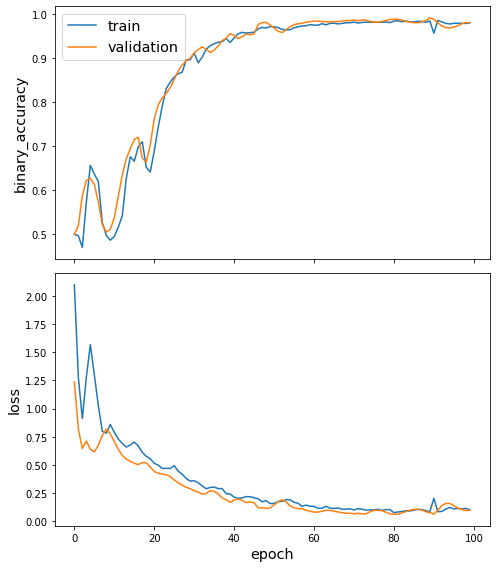

In [44]:
sg.utils.plot_history(history)


In [45]:
train_metrics = model.evaluate(train_flow)
test_metrics = model.evaluate(test_flow)

print("\nTrain Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, train_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nTest Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

1/1 [==============================] - 0s 94ms/step - loss: 0.0959 - binary_accuracy: 0.9811

Train Set Metrics of the trained model:
	loss: 0.0924
	binary_accuracy: 0.9828

Test Set Metrics of the trained model:
	loss: 0.0959
	binary_accuracy: 0.9811


In [46]:
y_pred = model.predict(train_flow)
Y=model.predict(test_flow)

In [47]:
y_pred.shape

(1, 13362)

In [48]:
Y.shape

(1, 16702)

In [49]:
import numpy as np

In [50]:
em=np.concatenate((Y, y_pred), axis=1)

In [51]:
la=np.concatenate((edge_labels_train, edge_labels_test), axis=0)

In [52]:
la

array([1, 1, 1, ..., 0, 0, 0])

In [53]:
L=np.concatenate((edge_ids_train, edge_ids_test), axis=0)

In [54]:
em.shape

(1, 30064)

In [55]:
L.shape

(30064, 2)

In [56]:
em=np.transpose(em)
em

array([[1.0803328 ],
       [0.93114614],
       [1.4017355 ],
       ...,
       [0.        ],
       [0.20861408],
       [0.        ]], dtype=float32)

In [57]:
scores=np.concatenate((L, em), axis=1)

In [58]:
Scores=pd.DataFrame(scores)

In [59]:
Scores[3]=la

In [60]:
Scores

,0,1,2,3
0,DB00317,DB00448,1.08033,1
1,DB00956,DB01176,0.931146,1
2,DB00796,DB09282,1.40174,1
3,DB00384,DB00908,0.998205,1
4,DB00220,DB00696,0.994071,1
...,...,...,...,...
30059,DB11786,DB00415,0,0
30060,DB07178,DB14845,0,0
30061,DB00853,DB02235,0,0
30062,DB16229,DB02238,0.208614,0


In [61]:
Scores=Scores.sort_values(by=[2],ascending=False)

In [62]:
Scores.head(10)

,0,1,2,3
3156,DB00344,DB00679,2.94705,1
6583,DB00344,DB00715,2.6416,1
20602,DB00319,DB00684,2.64058,1
6017,DB00307,DB00813,2.59767,1
21854,DB16097,DB11798,2.59293,0
18714,DB00413,DB00490,2.58855,1
17459,DB00921,DB01236,2.58545,1
6283,DB00363,DB06700,2.56322,1
22197,DB06934,DB14868,2.52347,0
18486,DB00956,DB08820,2.48452,1


In [64]:
Scores.to_csv('Scores.csv')

In [7]:
G=nx.read_adjlist("DDI.csv")

In [ ]:
nx.draw(G)

In [ ]:
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))